<a href="https://colab.research.google.com/github/chav120/ITP-449-EDA-Project/blob/main/EDA_Chavez_Joseph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

df = pd.read_csv('stephcurrystats.csv') 
frame = pd.DataFrame(df)
frame.index = frame.index + 1
print(frame)


    OPP  WEEK MONTH       MIN  FGM  ...  P/M  RESULT  SCOREGS  SCOREOPP  COURT
1   BRO     1   DEC  30:19:00    7  ...  -23       0       99       125      A
2   MIL     1   DEC  28:58:00    6  ...  -24       0       99       138      A
3   CHI     1   DEC  36:26:00   11  ...    3       1      129       128      A
4   DET     2   DEC  34:50:00    9  ...    3       1      116       106      A
5   POR     2   JAN  33:38:00    9  ...  -27       0       98       123      H
6   POR     2   JAN  36:26:00   18  ...   20       1      137       122      H
7   SAC     3   JAN  30:34:00    9  ...   26       1      137       106      H
8   LAC     3   JAN  34:59:00    5  ...  -10       0      101       108      H
9   LAC     3   JAN  36:15:00   13  ...   13       1      115       105      H
10  TOR     3   JAN  38:12:00    2  ...    7       1      106       105      H
11  PAC     4   JAN  35:53:00    7  ...   -2       0       95       104      H
12  DEN     4   JAN  36:58:00   14  ...  -21       0

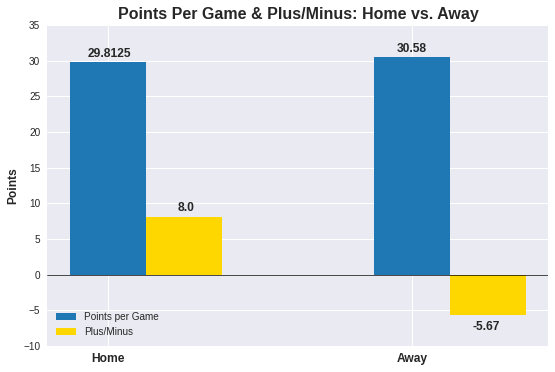

In [88]:
awayGames = frame.loc[frame["COURT"] == "A"]
awayAveragePoints = np.mean(awayGames["PTS"])
awayAveragePM = np.mean(awayGames["P/M"])

homeGames = frame.loc[frame["COURT"] == "H"]
homeAveragePoints = np.mean(homeGames["PTS"])
homeAveragePM = np.mean(homeGames["P/M"])

labels = ["Home", "Away"]
w = 0.25
bars1 = [homeAveragePoints, awayAveragePoints]
bars2 = [homeAveragePM, awayAveragePM]
w1 = np.arange(len(bars1))
w2 = [x + w for x in w1]

plt.style.use("seaborn-notebook")
legend = ["Points per Game", "Plus/Minus"]
plt.ylim(-10,35)
plt.bar(w1, bars1, width=w, color="tab:blue")
plt.bar(w2, bars2, width=w, color="gold")
plt.xticks(np.arange(len(labels)), labels=labels, fontweight="bold", fontsize=12)
plt.ylabel("Points", fontweight="bold", fontsize=12)
plt.title("Points Per Game & Plus/Minus: Home vs. Away", fontweight="bold", fontsize=16)
plt.legend(legend, loc=3)
plt.axhline(y=0, linewidth=0.7, color="black")
plt.text(-.067, 30.5, homeAveragePoints, fontweight="bold", fontsize=12)
plt.text(.23, 9, homeAveragePM, fontweight="bold", fontsize=12)
plt.text(0.95, 31.2, "30.58", fontweight="bold", fontsize=12)
plt.text(1.2, -7.7, "-5.67", fontweight="bold", fontsize=12)
plt.show()


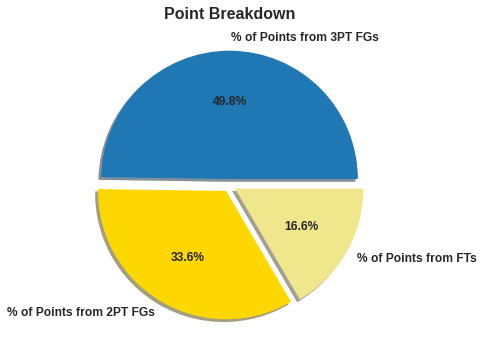

In [89]:
threePoints = sum(frame["3PM"]) * 3

twoPoints = (sum(frame["FGM"]) - sum(frame["3PM"])) * 2

freeThrows = sum(frame["FTM"])

labels = ["% of Points from 3PT FGs", "% of Points from 2PT FGs", "% of Points from FTs"]
values = [threePoints, twoPoints, freeThrows]

plt.style.use("seaborn-notebook")
plt.pie(values, explode = (0.05,0.05,0.05), labels=labels, autopct='%1.1f%%', colors=("tab:blue", "gold", "khaki"), textprops={'fontsize': 12, "fontweight": "bold"}, shadow=True)
plt.title("Point Breakdown", fontweight = "bold", fontsize=16)
plt.show()

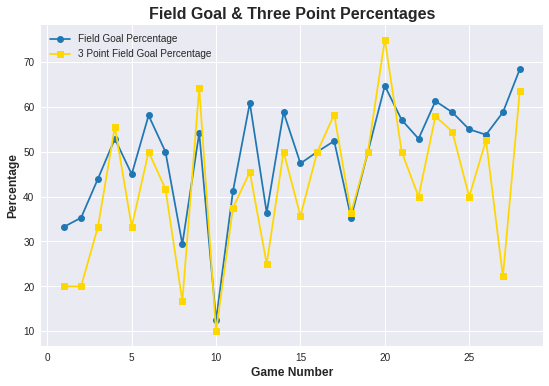

In [90]:
plt.style.use("seaborn-notebook")
plt.plot(frame["FG%"], "o-", label="Field Goal Percentage", color="tab:blue")
plt.plot(frame["3P%"], "s-", label="3 Point Field Goal Percentage", color="gold")
plt.legend(loc=2)
plt.xlabel("Game Number", fontweight="bold", fontsize=12)
plt.ylabel("Percentage", fontweight="bold", fontsize=12)
plt.title("Field Goal & Three Point Percentages", fontweight="bold", fontsize=16)
plt.show()

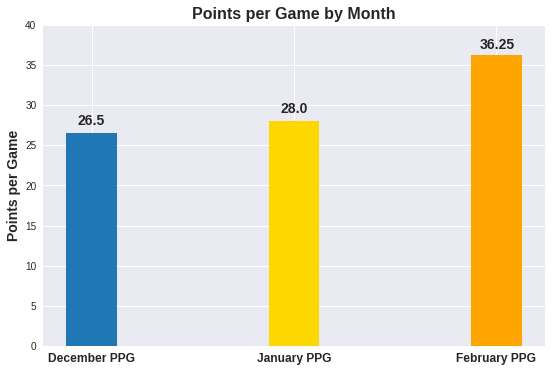

In [91]:
dec = frame.loc[frame["MONTH"] == "DEC"]
decPPG = np.mean(dec["PTS"])

jan = frame.loc[frame["MONTH"] == "JAN"]
janPPG = np.mean(jan["PTS"])

feb = frame.loc[frame["MONTH"] == "FEB"]
febPPG = np.mean(feb["PTS"])

plt.style.use("seaborn-notebook")
months = ["December PPG", "January PPG", "February PPG"]
numbers = [decPPG, janPPG, febPPG]
colors = ["tab:blue", "gold", "orange"]
plt.bar(months, numbers, width=0.25, color=colors)
plt.title("Points per Game by Month", fontweight="bold", fontsize=16)
plt.xticks(fontweight="bold", fontsize=12)
plt.yticks(fontsize=10)
plt.ylim([0, 40])
plt.ylabel("Points per Game", fontsize=14, fontweight="bold")
plt.text(-.07, 27.5, decPPG, fontsize=14, fontweight="bold")
plt.text(.933, 29, janPPG, fontsize=14, fontweight="bold")
plt.text(1.915, 37, febPPG, fontsize=14, fontweight="bold")
plt.show()



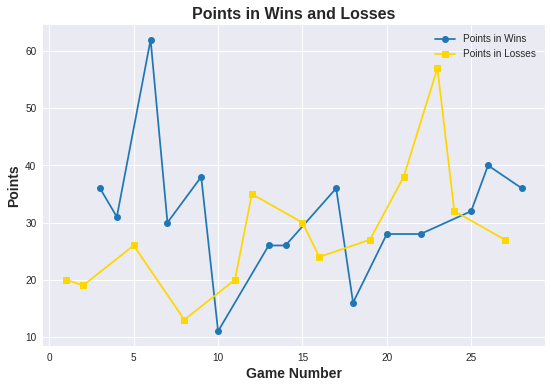

In [92]:
plt.style.use("seaborn-notebook")

win = frame.loc[frame["RESULT"] == 1]
plt.plot(win["PTS"], "o-", label="Points in Wins", color="tab:blue")

loss = frame.loc[frame["RESULT"] == 0]
plt.plot(loss["PTS"], "s-", label="Points in Losses", color="gold")

plt.ylabel("Points", fontsize=14, fontweight="bold")
plt.xlabel("Game Number", fontweight="bold", fontsize=14)

plt.title("Points in Wins and Losses", fontweight="bold", fontsize=16)

plt.legend()

plt.show()